### Liverpool airport expansion plans

The [Liverpool Airport Masterplan 2050](https://www.liverpoolairport.com/media/2957/liverpool-john-lennon-airport-master-plan-to-2050.pdf) has a chart of future growth, which is wildly different to the official [UK Aviation forecasts](https://www.gov.uk/government/publications/uk-aviation-forecasts-2017)

![alt text](fig51_liverpool_airport.png "Fig5.1")

In [3]:
# Now we load the data in from the official government predictions

# (There has been more invested in the development of these models 
# than any other part of the economy!)

from databaker.framework import *
import pandas as pd
tabs = loadxlstabs("uk-aviation-forecasts-2017-annual-airport-data.xlsx")
tabB = tabs[0]
tabH = tabs[4]
print("\nbaseline:", tabB.name, "\nHeathrow expansion:", tabH.name)

Loading uk-aviation-forecasts-2017-annual-airport-data.xlsx which has size 130576 bytes
Table names: ['Baseline Central Pax', 'LGW 2R Central Pax', 'LHR ENR Central Pax', 'LHR NWR Central Pax', 'LHR NWR Phased Central Pax', 'Baseline Central ATMs', 'LGW 2R Central ATMs', 'LHR ENR Central ATMs', 'LHR NWR Central ATMs', 'LHR NWR Phased Central ATMs']

baseline: Baseline Central Pax 
Heathrow expansion: LHR NWR Phased Central Pax


In [4]:
def conv(tab):
    obs = tab.excel_ref('B6').expand(DOWN).expand(RIGHT).is_not_blank().is_not_whitespace()
    dimensions = [ 
        HDim(tab.excel_ref('B1'), TIME, CLOSEST, ABOVE), 
        HDim(tab.excel_ref('B5').expand(RIGHT), "Year", DIRECTLY, ABOVE), 
        HDim(tab.excel_ref('A6').expand(DOWN), "Airport", DIRECTLY, LEFT), 
        HDimConst("case", "mid")
    ]
    conversionsegment = ConversionSegment(tab, dimensions, obs)
    #savepreviewhtml(conversionsegment)
    df = conversionsegment.topandas()[["Airport", "Year", "OBS"]]
    df["Year"] = pd.to_numeric(df.Year).astype(int)
    df = df.pivot(index='Airport', columns='Year', values='OBS')
    return df

dfB = conv(tabB)
dfH = conv(tabH)

TIMEUNIT=''
TIMEUNIT=''


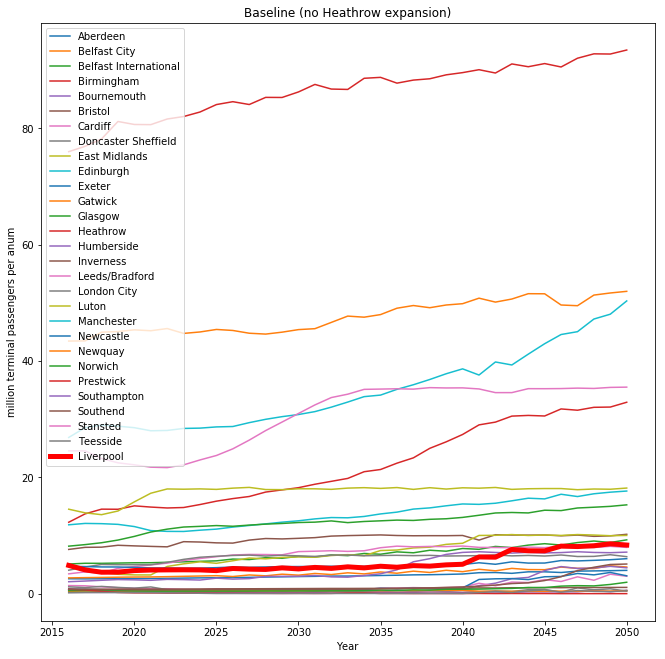

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

def plotgraphliv(df, airports, title):
    plt.figure(figsize=(11,11))
    for airport in airports:
        df.loc[airport].plot()
    plt.plot(df.loc["Liverpool"], linewidth=5, color="red")
    plt.ylabel("million terminal passengers per anum")
    plt.title(title)
    plt.legend()
    
allairports = list(dfB.index)
allairports.remove("Liverpool")
plotgraphliv(dfB, allairports, "Baseline (no Heathrow expansion)")

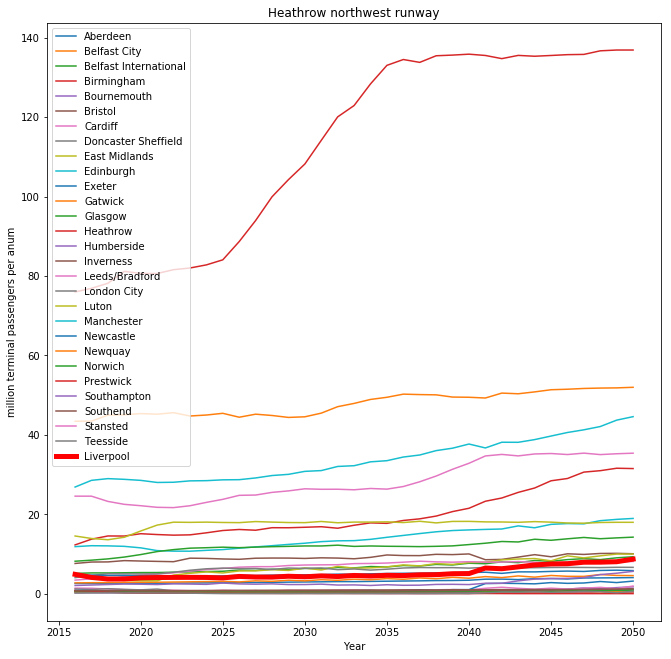

In [8]:
plotgraphliv(dfH, allairports, "Heathrow northwest runway")

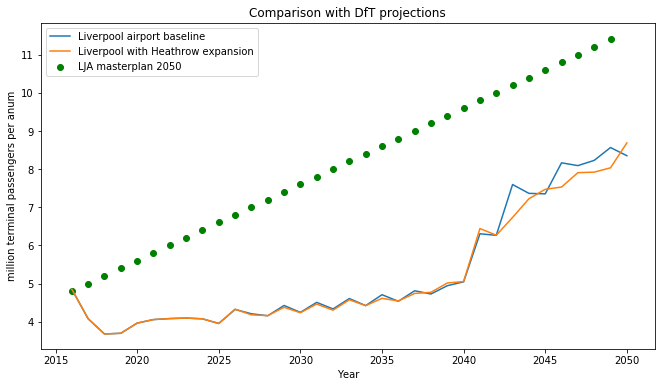

In [14]:
plt.figure(figsize=(11,6))
plt.plot(dfB.loc["Liverpool"], label="Liverpool airport baseline")
plt.plot(dfH.loc["Liverpool"], label="Liverpool with Heathrow expansion")
ys = list(range(2016, 2050))
lj2016, lj2050 = 4.8, 11.6
ljguess = [(y-2016)/(2050-2016)*(lj2050-lj2016) + lj2016  for y in ys]
plt.scatter(ys, ljguess, label="LJA masterplan 2050", color="green")
plt.ylabel("million terminal passengers per anum")
plt.xlabel("Year")
plt.title("Comparison with DfT projections")
plt.gca().set_alpha(1)
plt.legend()
plt.savefig("thing.png")

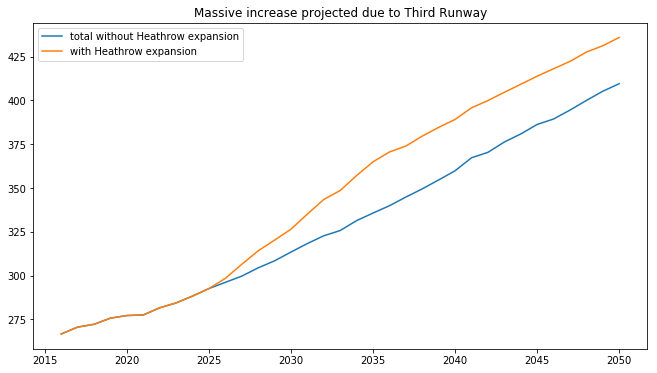

In [104]:
plt.figure(figsize=(11,6))
plt.plot(dfB.sum(axis=0), label="total without Heathrow expansion")
plt.plot(dfH.sum(axis=0), label="with Heathrow expansion")
plt.title("Massive increase projected due to Third Runway")
plt.legend()
